# Getting the data and importing the libraries 

In [ ]:
!git clone https://github.com/Henya14/deep-learning-ner.git
!cp -R ./deep-learning-ner/data ./data
!cp -R ./deep-learning-ner/training.py ./

In [43]:
from training import get_dfs, train_test_devel_data_path
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

Here I create new sentences from the tokens in the train df that are not tagged as other(O)

In [3]:
dfs = get_dfs()
train_no_O_tags_df = dfs["train"].copy()
train_no_O_tags_df = train_no_O_tags_df[dfs["train"]["CONLL:NER"] != "O"]
max_sentence_index =  dfs["train"]["sentence_index"].max()
train_no_O_tags_df["sentence_index"] = train_no_O_tags_df["sentence_index"] + max_sentence_index + 1


Loading: data\train-devel-test\devel\fiction\no-morph
Loading: data\train-devel-test\devel\legal\no-morph
Loading: data\train-devel-test\devel\news\no-morph
Loading: data\train-devel-test\test\fiction\no-morph
Loading: data\train-devel-test\test\legal\no-morph
Loading: data\train-devel-test\test\news\no-morph
Loading: data\train-devel-test\train\fiction\no-morph
Loading: data\train-devel-test\train\legal\no-morph
Loading: data\train-devel-test\train\news\no-morph
Loading: data\train-devel-test\train\wikipedia\no-morph


Here I create a df that contains all the original tokens and the non-O tags in the new sentences

In [5]:
all_df = pd.concat([dfs["train"],train_no_O_tags_df])
all_df

,sentence_index,position_number_in_sentence,FORM,LEMMA,UPOS,XPOS,FEATS,CONLL:NER,train_test_devel,genre,file_path
0,0,0,-,_,_,_,_,O,train,fiction,data\train-devel-test\train\fiction\no-morph\c...
1,0,1,Korán,_,_,_,_,O,train,fiction,data\train-devel-test\train\fiction\no-morph\c...
2,0,2,ebédelnek,_,_,_,_,O,train,fiction,data\train-devel-test\train\fiction\no-morph\c...
3,0,3,",",_,_,_,_,O,train,fiction,data\train-devel-test\train\fiction\no-morph\c...
4,0,4,úgy,_,_,_,_,O,train,fiction,data\train-devel-test\train\fiction\no-morph\c...
...,...,...,...,...,...,...,...,...,...,...,...
637829,85774,8,László,_,_,_,_,I-PER,train,wikipedia,data\train-devel-test\train\wikipedia\no-morph...
637845,85775,0,Hispaniola,_,_,_,_,B-LOC,train,wikipedia,data\train-devel-test\train\wikipedia\no-morph...
637851,85775,6,Haitiben,_,_,_,_,B-LOC,train,wikipedia,data\train-devel-test\train\wikipedia\no-morph...
637854,85775,9,Dominikai,_,_,_,_,B-LOC,train,wikipedia,data\train-devel-test\train\wikipedia\no-morph...


# Getting the sentences

This is the reworked `get_sentences` function from `training.py` that returns a pandas `DataFrame` with the sentences instead

In [9]:
from tqdm import tqdm
def get_sentences(df: pd.DataFrame):
    copy_df = df.copy()
    copy_df = copy_df.sort_values(["sentence_index", "position_number_in_sentence"])
    sentences = pd.DataFrame(columns=["FORM", "TAG"] )
    print(f"There are {len(copy_df['sentence_index'].unique())} sentences in the dataset")
    for i in tqdm(range(copy_df["sentence_index"].max())):
        form_tag_pairs = copy_df[copy_df["sentence_index"]==i][["sentence_index","position_number_in_sentence", "FORM", "CONLL:NER"]]
        if (len(form_tag_pairs) > 0):
            row = {
                    "FORM": form_tag_pairs["FORM"].tolist(),
                    "TAG": form_tag_pairs["CONLL:NER"].tolist(),
                }
            row = pd.Series(row)
            sentences.loc[len(sentences)] = row
            #sentences.append({"FORM": form_tag_pairs["FORM"].tolist(),"TAG": form_tag_pairs["CONLL:NER"].tolist()})
        
    return sentences

In [10]:
train_sentence_df = get_sentences(all_df)

There are 63532 sentences in the dataset


100%|███████████████████████████████████████████████████████████████████████████| 85775/85775 [07:06<00:00, 200.91it/s]


Here I get the original sentences and the sentences without the O tag

In [17]:
original_sentences_df = train_sentence_df[:42884].copy()
sentences_without_O_tag_df = train_sentence_df[42884:].copy()

Here I remove the duplicate sentences from the non-O sentences. I needed to use a little hack because `drop_duplicates` does not work on lists so the data fram had to be converted to string and then drop the duplicates. 

In [33]:
sentences_without_O_tag_df = sentences_without_O_tag_df.loc[sentences_without_O_tag_df.astype(str).drop_duplicates().index]

In [34]:
sentences_without_O_tag_df

,FORM,TAG
42884,"[Loder, Chilcote]","[B-PER, B-PER]"
42885,[Éva],[B-PER]
42886,"[Chilcote, Clifford's, Innbe]","[B-PER, B-LOC, I-LOC]"
42887,[Chilcote],[B-PER]
42891,"[Trafalgar-, téren, Chilcote]","[B-LOC, I-LOC, B-PER]"
...,...,...
63524,"[HMS, Dublin]","[B-MISC, I-MISC]"
63525,[Ancona],[B-LOC]
63526,"[Benfica, Manchester, United]","[B-ORG, B-ORG, I-ORG]"
63528,"[Nagybaconban, Székelykeresztúron, Székelyudva...","[B-LOC, B-LOC, B-LOC, B-LOC]"


Here I save each data frame, beacause getting the sentences takes a lot of time and this way it will be quicker to load them before use.

In [35]:
sentences_without_O_tag_df.to_csv("removed_o_tag_sentences.csv", index=False)

In [36]:
original_sentences_df.to_csv("original_sentences.csv", index=False)

# Augmenting the train dataset

Here I define the data frame augmentation function that adds the non-O tag sentences the specified amount of times to the original sentences

In [47]:
import os
def get_augmented_train_df(add_no_o_tag_sentences_num_times = 1): 
    train_df = pd.read_csv(os.path.join(train_test_devel_data_path, "train", "original_sentences.csv"))
    train_sentences_removed_o_tag_df =  pd.read_csv(os.path.join(train_test_devel_data_path, "train", "removed_o_tag_sentences.csv"))
    for i in range(add_no_o_tag_sentences_num_times):
        train_df = pd.concat([train_df, train_sentences_removed_o_tag_df], ignore_index=True)
    return train_df


Here I check how the augmentation changed the tag distribution

The data frame's 87.58% is tagged as O


<BarContainer object of 9 artists>

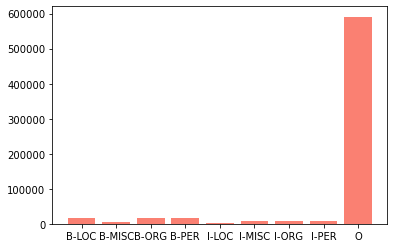

In [50]:
from collections import Counter


augmented_train_df = get_augmented_train_df(1)
tags = augmented_train_df["TAG"].apply(eval).tolist()
tags = [item for item_list in tags for item in item_list]
value_counts= pd.Series(Counter(tags)).sort_index()
print(f"The data frame's {value_counts['O']/ value_counts.sum() * 100:.2f}% is tagged as O")
plt.bar(value_counts.keys(), value_counts.values, color="salmon", label="# of tags")